# Decision Tree Classification 

**Dataset Information**

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.


Attribute Information:

1. variance of Wavelet Transformed image (continuous)
2. skewness of Wavelet Transformed image (continuous)
3. curtosis of Wavelet Transformed image (continuous)
4. entropy of image (continuous)
5. class (integer)

**Problem Statement**

Using the iven attributes, build a classifier to predict the class gien the input attributes





### Import packages and dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix

from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

In [3]:
df = pd.read_csv('data_banknote_authentication.csv', header = None)
df.head()

,0,1,2,3,4
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
df[4].value_counts()

4
0    762
1    610
Name: count, dtype: int64

In [5]:
df[4].unique()

array([0, 1], dtype=int64)

## EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1372 non-null   float64
 1   1       1372 non-null   float64
 2   2       1372 non-null   float64
 3   3       1372 non-null   float64
 4   4       1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


## Train Test Split

In [7]:
#descriptive features
X = df[[0,1,2,3]].values
#target feature
y = df.iloc[:, 4].values

In [8]:
X.shape

(1372, 4)

In [9]:
y.shape

(1372,)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

## Feature Scaling

In [11]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Model Fit and Training

# 1. entropy

In [43]:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

## Prediction

In [44]:
y_pred = classifier.predict(X_test)

In [45]:
df_check = pd.DataFrame({"y_actual":y_test,"y_predicted":y_pred})
df_check.head()

,y_actual,y_predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


## Evaluation 

In [46]:
print ('Accuracy', accuracy_score(y_test, y_pred))
print()
results = confusion_matrix(y_test, y_pred)
print(results)
print()
print ('Report:')
print (classification_report(y_test,y_pred))

Accuracy 0.9854227405247813

[[190   1]
 [  4 148]]

Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       191
           1       0.99      0.97      0.98       152

    accuracy                           0.99       343
   macro avg       0.99      0.98      0.99       343
weighted avg       0.99      0.99      0.99       343



In [47]:
from sklearn.metrics import ConfusionMatrixDisplay

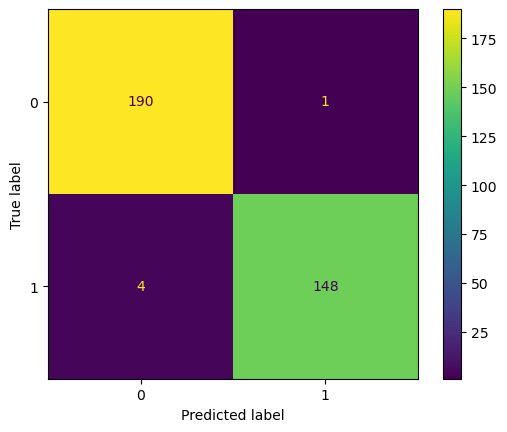

In [48]:
disp = ConfusionMatrixDisplay(results)
disp.plot()

## Saving the Decison Tree

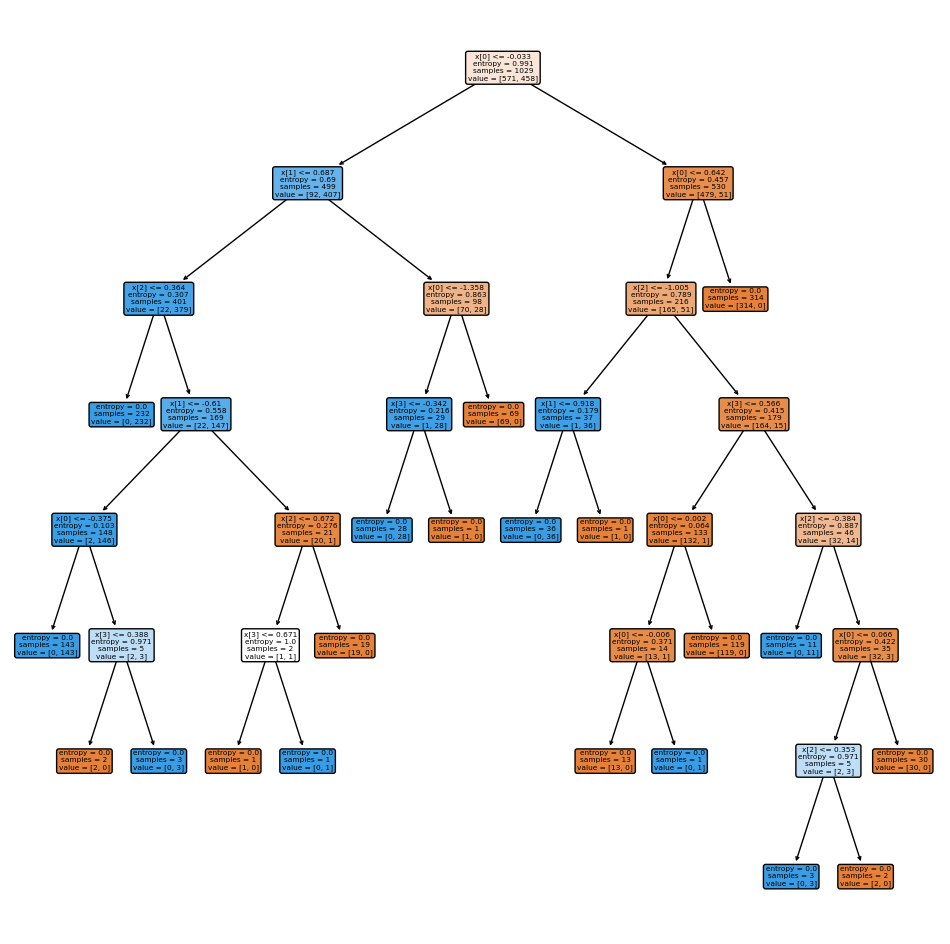

In [49]:
from sklearn import tree
fig, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(classifier, filled=True, rounded=True, ax=ax)
plt.savefig('decision_tree.png')

# 2. gini

In [50]:
classifier = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

## Prediction

In [51]:
y_pred = classifier.predict(X_test)

In [52]:
df_check = pd.DataFrame({"y_actual":y_test,"y_predicted":y_pred})
df_check.head()

,y_actual,y_predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


## Evaluation 

In [53]:
print ('Accuracy', accuracy_score(y_test, y_pred))
print()
results = confusion_matrix(y_test, y_pred)
print(results)
print()
print ('Report:')
print (classification_report(y_test,y_pred))

Accuracy 0.9825072886297376

[[191   0]
 [  6 146]]

Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       191
           1       1.00      0.96      0.98       152

    accuracy                           0.98       343
   macro avg       0.98      0.98      0.98       343
weighted avg       0.98      0.98      0.98       343



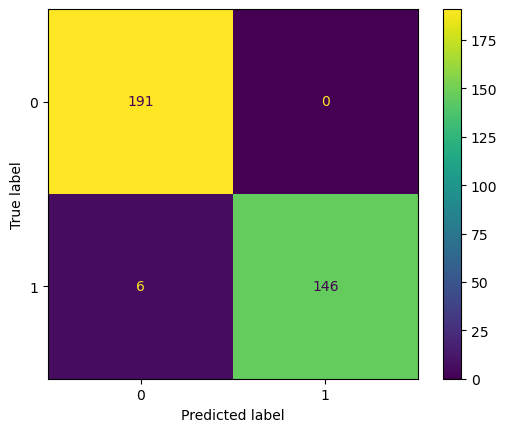

In [54]:
disp = ConfusionMatrixDisplay(results)
disp.plot()

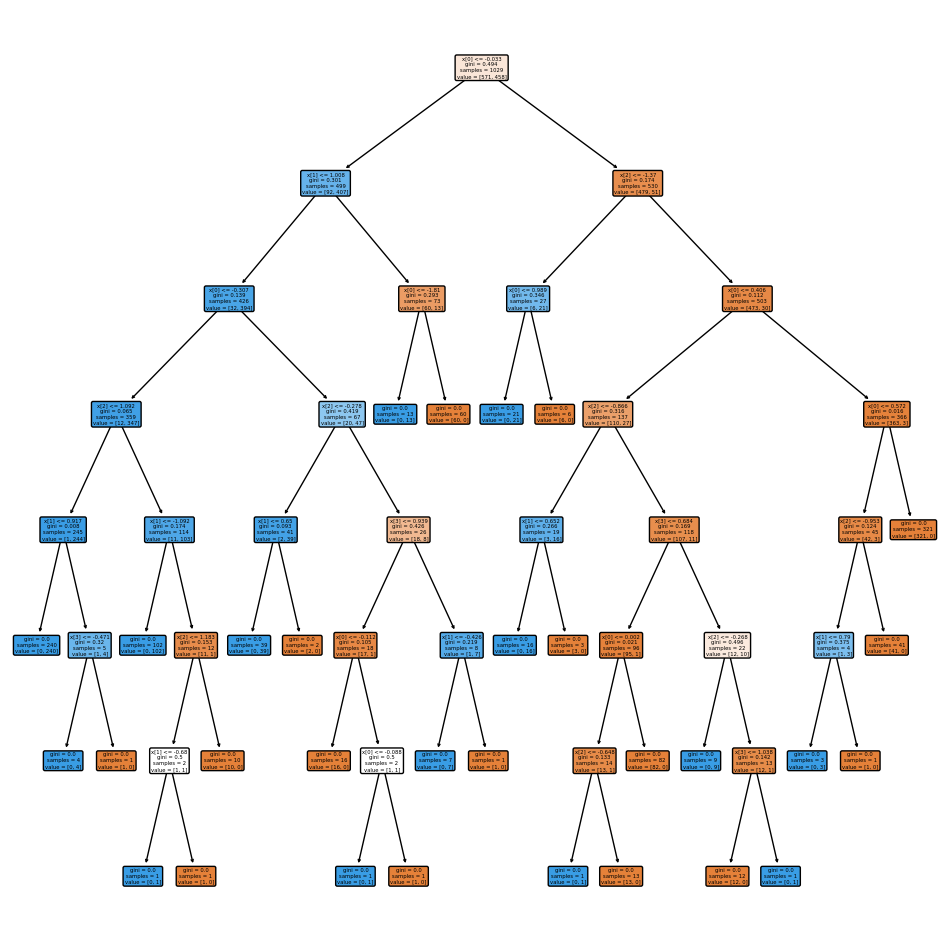

In [55]:
fig, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(classifier, filled=True, rounded=True, ax=ax)
plt.savefig('decision_tree.png')

# 3. log_loss

In [56]:
classifier = DecisionTreeClassifier(criterion = 'log_loss', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='log_loss', random_state=0)

In [57]:
y_pred = classifier.predict(X_test)

In [58]:
df_check = pd.DataFrame({"y_actual":y_test,"y_predicted":y_pred})
df_check.head()

,y_actual,y_predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


## Evaluation 

In [59]:
print ('Accuracy', accuracy_score(y_test, y_pred))
print()
results = confusion_matrix(y_test, y_pred)
print(results)
print()
print ('Report:')
print (classification_report(y_test,y_pred))

Accuracy 0.9854227405247813

[[190   1]
 [  4 148]]

Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       191
           1       0.99      0.97      0.98       152

    accuracy                           0.99       343
   macro avg       0.99      0.98      0.99       343
weighted avg       0.99      0.99      0.99       343



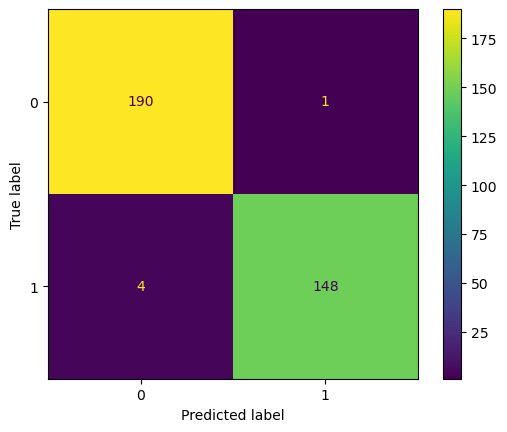

In [60]:
disp = ConfusionMatrixDisplay(results)
disp.plot()

## Saving the Decison Tree

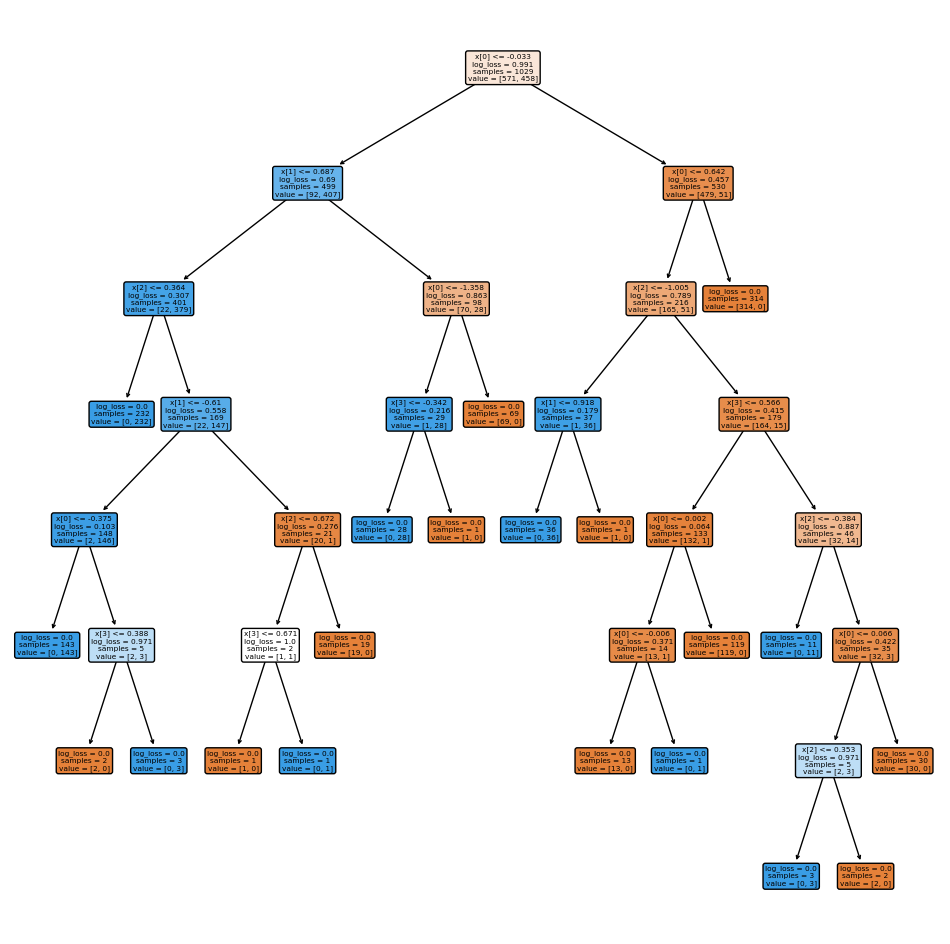

In [61]:
fig, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(classifier, filled=True, rounded=True, ax=ax)
plt.savefig('decision_tree.png')